# Make image pyramid

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
image = cv2.imread('../../mlrefined_images/convnet_images/dudes.png', 0)

#### OpenCV's version

In [3]:
cv2_low_res = cv2.pyrDown(image)

#### My version

In [4]:
# Define Gaussian kernel (to blur the image)
kernel = np.array([[1,  4,  6,  4, 1],
                   [4, 16, 24, 16, 4],
                   [6, 24, 36, 24, 6],
                   [4, 16, 24, 16, 4],
                   [1,  4,  6,  4, 1]]) 

kernel = kernel/256
L = int((np.shape(kernel)[0]-1)/2) 


# pad image with appropriate number of zeros for convolution
def pad_image(image, L):
    image_padded = np.zeros((np.shape(image)[0] + 2*L, np.shape(image)[1] + 2*L))
    image_padded[L:-L, L:-L] = image
    return image_padded 

# convolution function
def convolution_function(window):
    return np.sum(kernel*window) 


def sliding_window(image, window_size, func, stride):    
    # grab image size, set container for results
    N0, N1 = np.shape(image)
    results = []
    
    # slide window over input image
    for i in np.arange(0, N0 - window_size + 1, stride):
        for j in np.arange(0, N1 - window_size + 1, stride):
            # extract window from the image
            window = image[i:i+window_size, j:j+window_size]
            
            # process using the input 'func' (here the convolution function)
            processed_window = func(window)
            
            # store the results
            results.append(processed_window)
    
    # return results in numpy array format
    return np.array(results)


def downsample(image):
    
    # downsampling factor
    stride = 2

    # call sliding_window to perform convolution 
    results = sliding_window(pad_image(image, L), 2*L+1, convolution_function, stride)

    # compute downsampled image sizes
    N0_new = int((1+np.shape(image)[0])/stride)
    N1_new = int((1+np.shape(image)[1])/stride)

    # reshape results to become a matrix 
    my_low_res = np.reshape(results, (N0_new, N1_new))
    
    return my_low_res

In [5]:
Q = 7  # how many images in the pyramid?

# make the pyramid
pyramid = {}
for q in np.arange(0, Q):
    pyramid.update({str(q):image})
    image = downsample(image)

<IPython.core.display.Javascript object>


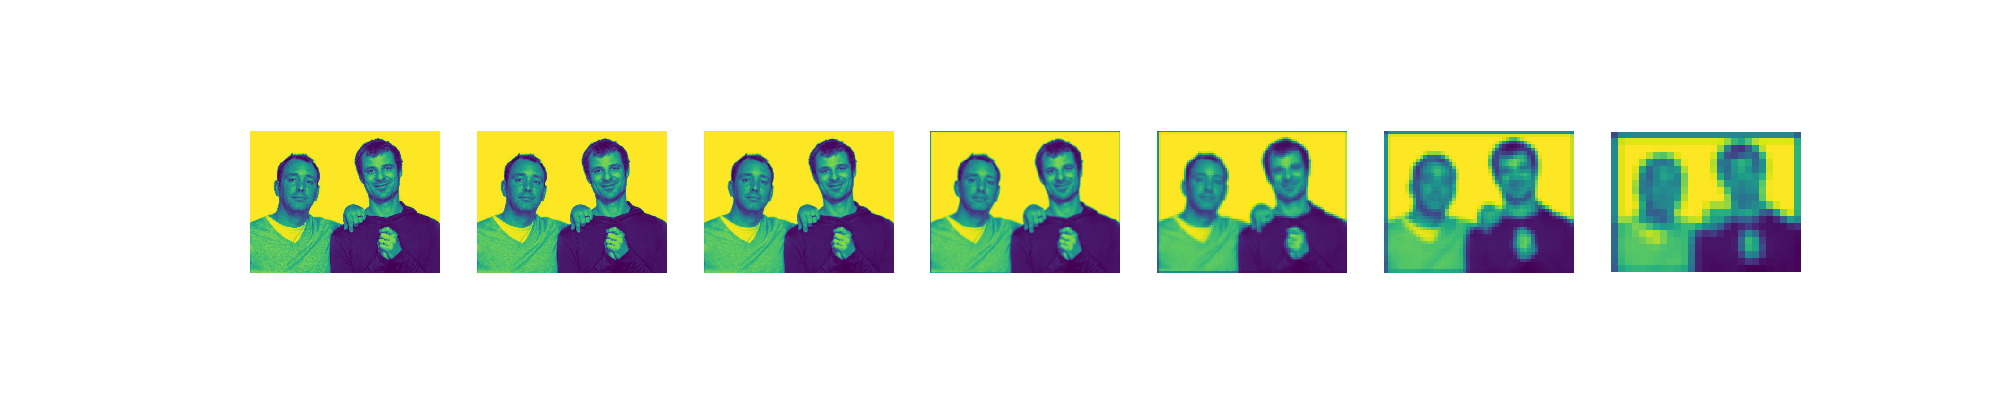

In [6]:
# plot images in the pyramid
%matplotlib notebook
fig = plt.figure(figsize=(10,2))

for q in np.arange(0, Q):
    fig.add_subplot(1, Q, q+1)
    plt.imshow(pyramid[str(q)])
    plt.axis('off')